In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

import folium
from sklearn import preprocessing
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Settings
%matplotlib inline

In [2]:
# Weergave aanpassen aan eigen voorkeur
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)

#### Selecteer en visualiseer locaties in een bepaald stroomgebied: Noordzeekanaal

In [3]:
df_rws = pd.read_csv('df_rws.csv')

In [4]:
df_nrdzee = df_rws.query('GBD == "NOORDZKNL"')

In [5]:
df_nrdzee['DATUM'] = df_nrdzee['DATUM'].str.slice(0, 7)

df_nrdzee.head()

C:\Users\Andries Jan\anacond\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Unnamed: 0    DATUM     LOC        GBD    TG     X_WGS     Y_WGS  \
27          27  2006-01   AMSDM  NOORDZKNL  14.0  4.905707  52.38077   
28          28  2006-01  IJMDN1  NOORDZKNL  13.0  4.622005  52.46601   
56          56  2006-02   AMSDM  NOORDZKNL   8.0  4.905707  52.38077   
57          57  2006-02  IJMDN1  NOORDZKNL   5.0  4.622005  52.46601   
86          86  2006-03   AMSDM  NOORDZKNL  36.0  4.905707  52.38077   

        X_RD      Y_RD  %DS_HDH_NVT  %GR_HDH_NVT  %O2_HDH_NVT  BaA_HDH_NVT  \
27  122216.0  488210.0          NaN         92.0        100.0          NaN   
28  103000.0  497860.0          NaN         86.0        104.0         0.01   
56  122216.0  488210.0          NaN         78.0         89.0          NaN   
57  103000.0  497860.0          NaN         82.0          NaN         0.01   
86  122216.0  488210.0          NaN         58.0        102.0          NaN   

    BaA_HDH_dg  CHLFa_HDH_NVT  Cl_HDH_nf  KjN_HDH_N  N_HDH_NVT  N_HDH_nf  \
27         NaN            3.0        NaN       0.81        NaN       NaN   
28         NaN            2.0     4921.0       0.71        NaN       NaN   
56         NaN           13.0     1821.0       0.96        NaN       NaN   
57         NaN            3.0     3981.0       0.96        NaN       NaN   
86         NaN           11.0     1399.0       1.30        NaN       NaN   

    N_HDH_pg  NH4_HDH_Nnf  NO2_HDH_Nnf  NO3_HDH_Nnf  O2_HDH_NVT  P_HDH_NVT  \
27       NaN          NaN          NaN          NaN        12.9       0.18   
28       NaN         0.41         0.14         1.71        12.2       0.25   
56       NaN         0.23         0.09         2.29         8.7       0.16   
57       NaN         0.32         0.15         3.12         9.4       0.23   
86       NaN         0.16         0.06         2.09        13.1       0.10   

    P_HDH_nf  P_HDH_pg  PO4_HDH_Pnf  Ra226_HDH_NVT  Ra226_HDH_dg  \
27       NaN       NaN          NaN            NaN           NaN   
28       NaN       NaN        0.210            NaN           NaN   
56       NaN       NaN        0.087            NaN           NaN   
57       NaN       NaN        0.170            NaN           NaN   
86       NaN       NaN        0.071            NaN           NaN   

    SALNTT_HDH_NVT  SiO2_HDH_Sinf  SiO2_HDH_Sipg  WINDSHD_HDH_NVT  \
27             NaN            NaN            NaN              4.0   
28             9.5           3.72            NaN              8.0   
56             NaN           3.01            NaN              3.0   
57             7.5           3.85            NaN              2.0   
86             NaN           2.49            NaN              4.0   

    ZICHT_HDH_NVT  ZS_HDH_NVT  pH_HDH_NVT  
27            9.0         8.0         7.8  
28           13.0         8.0         7.7  
56            8.0        16.0         7.8  
57           13.0         8.0         7.7  
86            7.0        15.0         7.9

In [6]:
df_nrdzee['LOC'].value_counts()

IJMDN1      137
AMSDM       136
WESTZN       89
WESTHVN2     23
AMRKHVN2     23
ZIJKNLE2     12
ZIJKNLD1     12
Name: LOC, dtype: int64

In [7]:
df_nrdzee = df_nrdzee.groupby(['DATUM']).mean()

In [8]:
df_nrdzee = df_nrdzee.interpolate()
df_nrdzee.isnull().sum() / df_nrdzee.shape[0] * 100

Unnamed: 0           0.00000
TG                   0.00000
X_WGS                0.00000
Y_WGS                0.00000
X_RD                 0.00000
Y_RD                 0.00000
%DS_HDH_NVT         10.15625
%GR_HDH_NVT          0.00000
%O2_HDH_NVT          0.00000
BaA_HDH_NVT          0.00000
BaA_HDH_dg          10.15625
CHLFa_HDH_NVT        0.00000
Cl_HDH_nf            0.00000
KjN_HDH_N            0.00000
N_HDH_NVT          100.00000
N_HDH_nf           100.00000
N_HDH_pg           100.00000
NH4_HDH_Nnf          0.00000
NO2_HDH_Nnf          0.00000
NO3_HDH_Nnf          0.00000
O2_HDH_NVT           0.00000
P_HDH_NVT            0.00000
P_HDH_nf           100.00000
P_HDH_pg           100.00000
PO4_HDH_Pnf          0.00000
Ra226_HDH_NVT      100.00000
Ra226_HDH_dg       100.00000
SALNTT_HDH_NVT       0.00000
SiO2_HDH_Sinf        0.00000
SiO2_HDH_Sipg      100.00000
WINDSHD_HDH_NVT      0.00000
ZICHT_HDH_NVT        0.00000
ZS_HDH_NVT           0.00000
pH_HDH_NVT           0.00000
dtype: float64

In [9]:
df_nrdzee.dropna(axis=1, inplace=True)
df_nrdzee.shape

(128, 24)

In [10]:
df_nrdzee.columns

Index(['Unnamed: 0', 'TG', 'X_WGS', 'Y_WGS', 'X_RD', 'Y_RD', '%GR_HDH_NVT',
       '%O2_HDH_NVT', 'BaA_HDH_NVT', 'CHLFa_HDH_NVT', 'Cl_HDH_nf', 'KjN_HDH_N',
       'NH4_HDH_Nnf', 'NO2_HDH_Nnf', 'NO3_HDH_Nnf', 'O2_HDH_NVT', 'P_HDH_NVT',
       'PO4_HDH_Pnf', 'SALNTT_HDH_NVT', 'SiO2_HDH_Sinf', 'WINDSHD_HDH_NVT',
       'ZICHT_HDH_NVT', 'ZS_HDH_NVT', 'pH_HDH_NVT'],
      dtype='object')

In [11]:
df_nrdzee.index = pd.to_datetime(df_nrdzee.index)

#### Visualisatie (sommige voedingsstoffen vermenigvuldigd om verband zichtbaarder te maken

C:\Users\Andries Jan\anacond\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


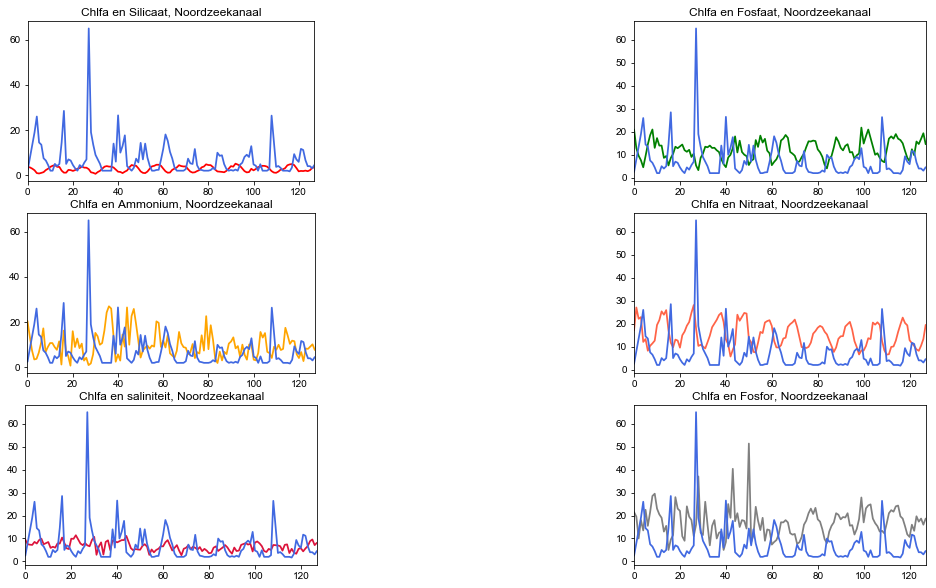

In [12]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20,10), subplot_kw={'aspect':'equal'})
sns.set(rc={"font.size":20,"axes.labelsize":20})

sns.tsplot([df_nrdzee.SiO2_HDH_Sinf], color='red', ax=ax1, legend=True, )
sns.tsplot([df_nrdzee.CHLFa_HDH_NVT], color='royalblue', ax=ax1, legend=True, )
ax1.set_title('Chlfa en Silicaat, Noordzeekanaal')

sns.tsplot([df_nrdzee.PO4_HDH_Pnf * 100] , color='green', ax=ax2)
sns.tsplot([df_nrdzee.CHLFa_HDH_NVT], color='royalblue', ax=ax2)
ax2.set_title('Chlfa en Fosfaat, Noordzeekanaal')

sns.tsplot([df_nrdzee.NH4_HDH_Nnf *50], color='orange', ax=ax3)
sns.tsplot([df_nrdzee.CHLFa_HDH_NVT], color='royalblue', ax=ax3)
ax3.set_title('Chlfa en Ammonium, Noordzeekanaal')

sns.tsplot([df_nrdzee.NO3_HDH_Nnf * 10], color='tomato', ax=ax4)
sns.tsplot([df_nrdzee.CHLFa_HDH_NVT], color='royalblue', ax=ax4)
ax4.set_title('Chlfa en Nitraat, Noordzeekanaal')

sns.tsplot([df_nrdzee.SALNTT_HDH_NVT], color='crimson', ax=ax5)
sns.tsplot([df_nrdzee.CHLFa_HDH_NVT], color='royalblue', ax=ax5)
ax5.set_title('Chlfa en saliniteit, Noordzeekanaal')

sns.tsplot([df_nrdzee.P_HDH_NVT * 100], color='grey', ax=ax6)
sns.tsplot([df_nrdzee.CHLFa_HDH_NVT], color='royalblue', ax=ax6)
ax6.set_title('Chlfa en Fosfor, Noordzeekanaal')

plt.show()

fig.savefig('ts_nrdzee_python.png')

#### Maas

In [13]:
df_maas = df_rws.query('GBD == "MAAS"')

In [14]:
df_maas['DATUM'] = df_maas['DATUM'].str.slice(0, 7)

df_maas.head()

C:\Users\Andries Jan\anacond\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Unnamed: 0    DATUM       LOC   GBD    TG     X_WGS     Y_WGS      X_RD  \
3            3  2006-01  EIJSDPTN  MAAS  -4.0  5.699107  50.77950  177000.0   
15          15  2006-01   BELFBVN  MAAS  41.0  6.113325  51.31860  205620.0   
16          16  2006-01  EIJSDPTN  MAAS  48.0  5.699107  50.77950  177000.0   
21          21  2006-01    STEVWT  MAAS  50.0  5.841665  51.13109  186812.0   
33          33  2006-01  EIJSDPTN  MAAS  -6.0  5.699107  50.77950  177000.0   

        Y_RD  %DS_HDH_NVT  %GR_HDH_NVT  %O2_HDH_NVT  BaA_HDH_NVT  BaA_HDH_dg  \
3   310000.0         40.0         71.0         99.2          NaN        1.00   
15  370180.0          NaN         68.0         81.0         0.01         NaN   
16  310000.0          NaN         85.0         85.0         0.01         NaN   
21  349166.0          NaN         74.0         77.9          NaN         NaN   
33  310000.0         36.0         54.0         88.0          NaN        0.88   

    CHLFa_HDH_NVT  Cl_HDH_nf  KjN_HDH_N  N_HDH_NVT  N_HDH_nf  N_HDH_pg  \
3             2.0       50.1       0.92        NaN       NaN       NaN   
15            2.0       56.8       0.61        NaN       NaN       NaN   
16            2.0       49.6       0.59        NaN       NaN       NaN   
21            2.0       55.0       0.45        NaN       NaN       NaN   
33            2.0       39.8       0.67        NaN       NaN       NaN   

    NH4_HDH_Nnf  NO2_HDH_Nnf  NO3_HDH_Nnf  O2_HDH_NVT  P_HDH_NVT  P_HDH_nf  \
3          0.30         0.06         4.22        12.3       0.22       NaN   
15         0.22         0.05         4.10        10.5       0.35       NaN   
16         0.37         0.05         4.30        10.7       0.26       NaN   
21         0.29         0.07         4.32         9.4       0.18       NaN   
33         0.31         0.05         4.03        11.5       0.21       NaN   

    P_HDH_pg  PO4_HDH_Pnf  Ra226_HDH_NVT  Ra226_HDH_dg  SALNTT_HDH_NVT  \
3        NaN         0.15            NaN           NaN             NaN   
15       NaN         0.15            NaN           NaN             0.3   
16       NaN         0.24            2.0           NaN             0.3   
21       NaN         0.32            NaN           NaN             NaN   
33       NaN         0.22            NaN           NaN             NaN   

    SiO2_HDH_Sinf  SiO2_HDH_Sipg  WINDSHD_HDH_NVT  ZICHT_HDH_NVT  ZS_HDH_NVT  \
3            3.48            NaN              0.0            8.0         6.0   
15           3.76            NaN              3.0           16.0         4.0   
16           3.46            NaN              3.0           10.0         4.0   
21           3.73            NaN              2.0           10.0         3.0   
33           3.37            NaN              2.0           10.0         5.0   

    pH_HDH_NVT  
3          8.0  
15         7.6  
16         7.9  
21         7.8  
33         7.9

In [15]:
df_maas['LOC'].value_counts()

EIJSDPTN    284
BELFBVN     142
STEVWT      130
Name: LOC, dtype: int64

In [16]:
df_maas = df_maas.groupby(['DATUM']).mean()

In [17]:
df_maas = df_maas.interpolate()


In [18]:
df_maas.dropna(axis=1, inplace=True)
df_maas.shape

(132, 27)

In [19]:
df_maas.columns

Index(['Unnamed: 0', 'TG', 'X_WGS', 'Y_WGS', 'X_RD', 'Y_RD', '%DS_HDH_NVT',
       '%GR_HDH_NVT', '%O2_HDH_NVT', 'BaA_HDH_NVT', 'BaA_HDH_dg',
       'CHLFa_HDH_NVT', 'Cl_HDH_nf', 'KjN_HDH_N', 'NH4_HDH_Nnf', 'NO2_HDH_Nnf',
       'NO3_HDH_Nnf', 'O2_HDH_NVT', 'P_HDH_NVT', 'PO4_HDH_Pnf',
       'Ra226_HDH_NVT', 'SALNTT_HDH_NVT', 'SiO2_HDH_Sinf', 'WINDSHD_HDH_NVT',
       'ZICHT_HDH_NVT', 'ZS_HDH_NVT', 'pH_HDH_NVT'],
      dtype='object')

In [20]:
df_maas.index = pd.to_datetime(df_maas.index)

C:\Users\Andries Jan\anacond\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


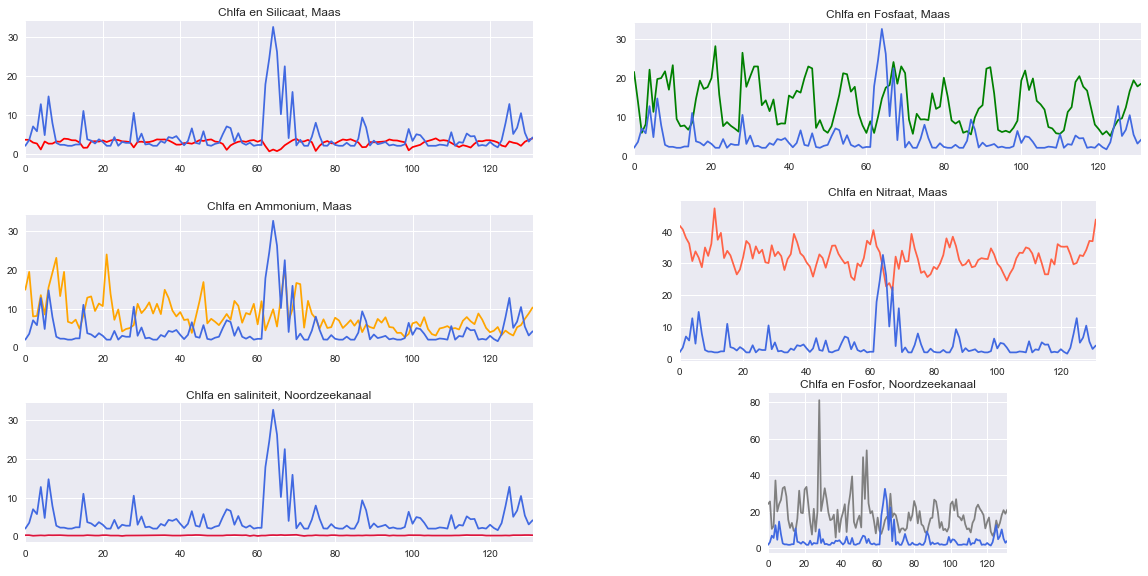

In [21]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20,10), subplot_kw={'aspect':'equal'})
sns.set(rc={"font.size":20,"axes.labelsize":20})

sns.tsplot([df_maas.SiO2_HDH_Sinf], color='red', ax=ax1)
sns.tsplot([df_maas.CHLFa_HDH_NVT], color='royalblue', ax=ax1)
ax1.set_title('Chlfa en Silicaat, Maas')

sns.tsplot([df_maas.PO4_HDH_Pnf * 100] , color='green', ax=ax2)
sns.tsplot([df_maas.CHLFa_HDH_NVT], color='royalblue', ax=ax2)
ax2.set_title('Chlfa en Fosfaat, Maas')

sns.tsplot([df_maas.NH4_HDH_Nnf *50], color='orange', ax=ax3)
sns.tsplot([df_maas.CHLFa_HDH_NVT], color='royalblue', ax=ax3)
ax3.set_title('Chlfa en Ammonium, Maas')

sns.tsplot([df_maas.NO3_HDH_Nnf * 10], color='tomato', ax=ax4)
sns.tsplot([df_maas.CHLFa_HDH_NVT], color='royalblue', ax=ax4)
ax4.set_title('Chlfa en Nitraat, Maas')

sns.tsplot([df_maas.SALNTT_HDH_NVT], color='crimson', ax=ax5)
sns.tsplot([df_maas.CHLFa_HDH_NVT], color='royalblue', ax=ax5)
ax5.set_title('Chlfa en saliniteit, Noordzeekanaal')

sns.tsplot([df_maas.P_HDH_NVT * 100], color='grey', ax=ax6)
sns.tsplot([df_maas.CHLFa_HDH_NVT], color='royalblue', ax=ax6)
ax6.set_title('Chlfa en Fosfor, Noordzeekanaal')

plt.show()

fig.savefig('ts_maas_python.png')